

# Project: Investigate a Dataset - Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<ul>
    <li>‘PatientId’: indicates the patient ID.</li>
    <li>‘AppointmentID’: indicates the patient's appointment ID.</li>
    <li>‘Gender’: indicates the gender of the patient.</li>
    <li>‘ScheduledDay’: tells us on what day the patient set up their appointment.</li>
    <li>‘Age’: indicates the age of the patient.</li>
    <li>‘Neighbourhood’: indicates the location of the hospital.</li>
    <li>‘Scholarship’: indicates whether or not the patient is enrolled in <a href="https://www.centreforpublicimpact.org/case-study/bolsa-familia-in-brazil#:~:text=The%20Programa%20Bolsa%20Família%20(PBF,ensure%20they%20are%20properly%20vaccinated">Brasilian welfare program "Bolsa Família"</a>.</li>
    <li>The Following Columns: ‘Hipertension’, ‘Diabetes’, ‘Alcoholism’, ‘Handcap’ 
    shows if the patient has any of those diseases or not; such that: <br>
        1 indicates True <br>
        and 0 indicates False.</li>
    <li>‘SMS_received’: indicates if the patient received SMS.</li>
    <li>‘No-show’: tells us if the patient showed up for the appointment or not; such that: <br>
        ‘No’ indicates that the patient has showed up <br>
        ‘Yes’ indicates that the patient has not showed up</li>
</ul>

### Question(s) for Analysis

#### <i> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? </i>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties


In [3]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Notes:
- There's probably a mistake in the patients' age column, as the minimum is -1.
- Most patients are betwwen the ages 18 and 55.
- Maximum age is 115.

Are there any duplicated data?

In [7]:
df.duplicated().any()

False

Are there any null values in the data?

In [8]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Notes:
- There's no missing (null) values in the data
- There's no dyplicated records
- The 'ScheduledDay' and 'AppointmentDay' columns are of type 'object' which needs to be changed to datetime <br>
    but we won't be using them in our current analysis
- There are typos in the column names which needs to be edited; They are <br>
    Hipertension -> Hypertension <br>
    Handcap -> Handicap <br>
    No-show -> No_show


### Data Cleaning


In [9]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We probably won't need the columns 'PatientId', 'AppointmentID', 'ScheduledDay' and 'AppointmentDay'. So, we dropped them.

Next, We're going to be renaming 'No-shows' to 'No_shows'

In [10]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.rename(columns={'Hipertension': 'Hypertension',
                   'Handcap': 'Handicap'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Corrected the column names for 'Hipertension' to 'Hypertension' <br> 
and 'Handcap' to 'Handicap'

In [12]:
false_age = df[df['Age'] == -1]
df.drop(false_age.index[0], axis=0, inplace=True)

We removed the column which caused the minimum age to be -1.

In [13]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis


We'll take a general look on the data

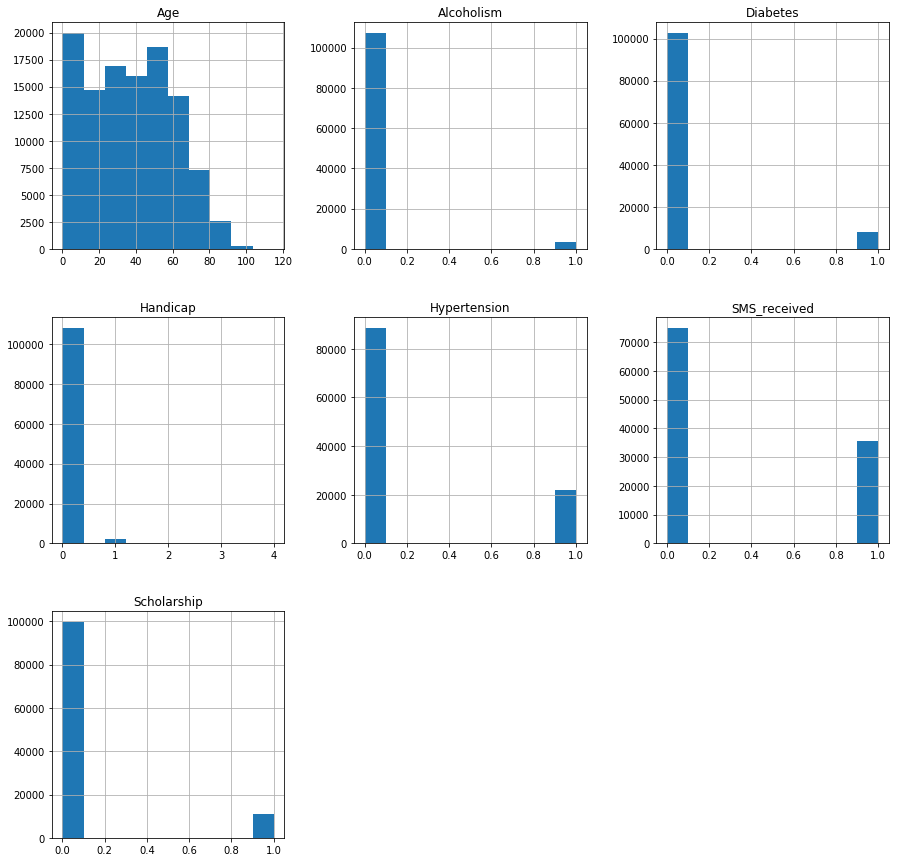

In [14]:
df.hist(figsize=(15,15));

Notes:
- About half of the patients received an SMS while the other half did not.
- Most people don't suffer from chronic diseases nor are handicapped.
- About 18% of the patients (20000 out of 110000) suffer from Hypertension.
- About 9% (10000 out of 110000) of the patients are enrolled in Brasilian welfare program "Bolsa Família"

In [15]:
# patients who showed to the appointment
show = df.No_show == 'No'

#patients who did not show to the appointment
no_show = df.No_show == 'Yes'

Here we created two masks from the 'No_show' column so we can compare between the data in an easy way.

#### Comparing between the number of people who showed and those who did not.

In [16]:
df[show].count()[1]

88207

In [17]:
df[no_show].count()[1]

22319

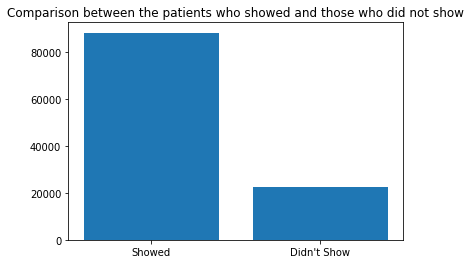

In [18]:
locations = [1, 2]
heights = [df[show].count()[1], df[no_show].count()[1]]
labels = ["Showed", "Didn't Show"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Comparison between the patients who showed and those who did not show');

We notice that:
- About 80% (88000 out of 110000) of the patients showed up to their appointments, and 20% (22000 out of 110000) of the patients did not show.
- the number of patients that showed was about 4 times the number of patients who did not show.

## Comparing According to Other Characteristics

#### Comparing to Gender

In [19]:
print('The number of patients who showed from both Genders:\n{}'.format(df.Gender[show].value_counts()))
print('\n')
print('The number of patients who did not show from both Genders:\n{}'.format(df.Gender[no_show].value_counts()))

The number of patients who showed from both Genders:
F    57245
M    30962
Name: Gender, dtype: int64


The number of patients who did not show from both Genders:
F    14594
M     7725
Name: Gender, dtype: int64


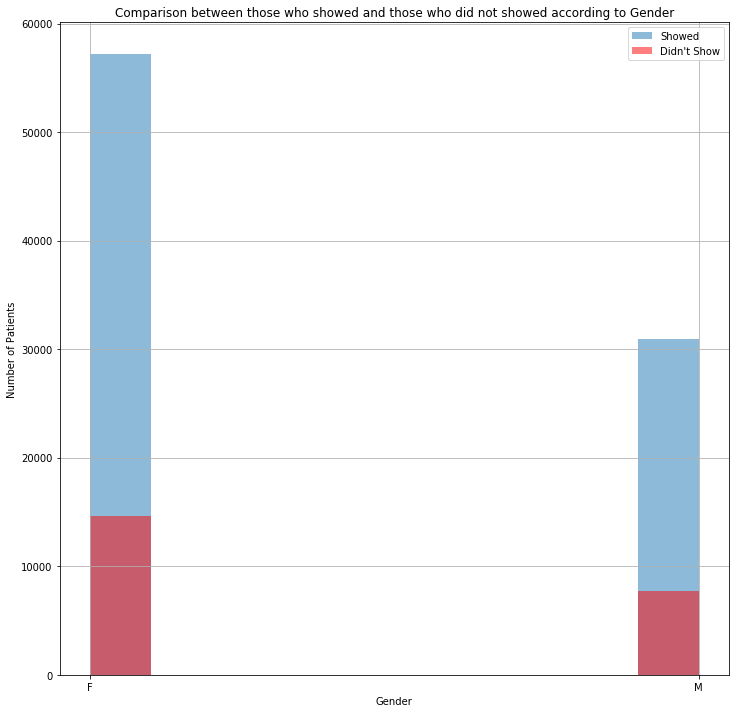

In [20]:
plt.figure(figsize=[12,12])
df.Gender[show].hist(alpha = 0.5, label = "Showed")
df.Gender[no_show].hist(alpha = 0.5, color='red', label = "Didn't Show")
plt.legend()
plt.title('Comparison between those who showed and those who did not showed according to Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients');

We notice that out of the 80% that showed up:
- About 65% of them were Females and 35% were Males

And that out of the 20% that didn't show up:
- About 64% of them were Females and 36% were Males

So the Gender is insignificant as the ratio between the females and the males appear to be the same.

#### Comparing to Age

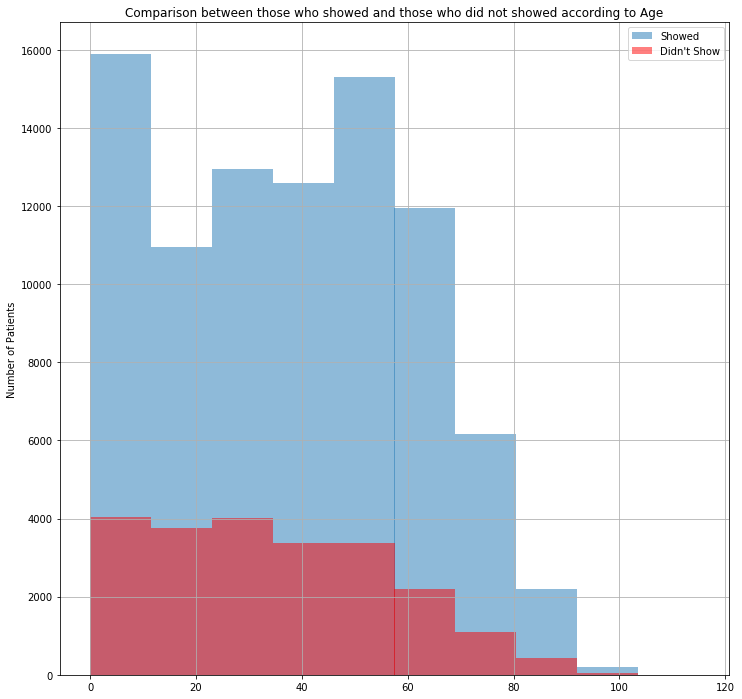

In [21]:
plt.figure(figsize=[12,12])
df.Age[show].hist(alpha = 0.5, label = "Showed")
df.Age[no_show].hist(alpha = 0.5, color='red', label = "Didn't Show")
plt.legend()
plt.title('Comparison between those who showed and those who did not showed according to Age')
plt.ylabel('Number of Patients');

We notice that:
- patients between the age of 0 to 10, showed up to their appointments more than the other groups and followed by the patients between the ages of 35 to 70
- patients tend to show up less when they are older

#### Comparing to Neighbourhood

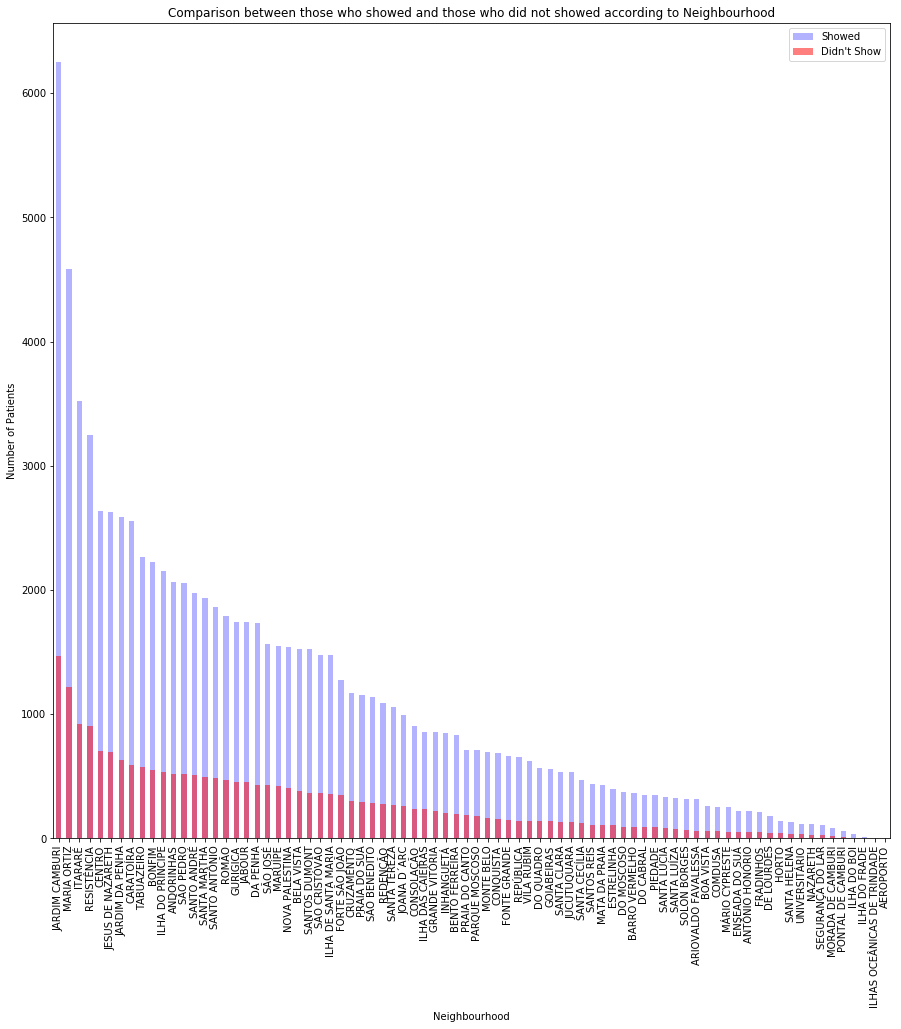

In [22]:
plt.figure(figsize=[15,15])
df.Neighbourhood[show].value_counts().plot(kind='bar', color='blue', alpha = 0.3, label = "Showed")
df.Neighbourhood[no_show].value_counts().plot(kind='bar', alpha = 0.5, color='red', label = "Didn't Show")
plt.legend()
plt.title('Comparison between those who showed and those who did not showed according to Neighbourhood')
plt.xlabel('Neighbourhood');
plt.ylabel('Number of Patients');

We notice that:
- Neighbourhood seems to be strongly influencing the number of patients who show up to their appointments

#### Comparing to Scholarship

In [23]:
print('The number of patients who showed who has a Scholarship:\n{}'.format(df.Scholarship[show].value_counts()))
print('\n')
print('The number of patients who did not show who does not have a Scholarship:\n{}'.format(df.Scholarship[no_show].value_counts()))

The number of patients who showed who has a Scholarship:
0    79924
1     8283
Name: Scholarship, dtype: int64


The number of patients who did not show who does not have a Scholarship:
0    19741
1     2578
Name: Scholarship, dtype: int64


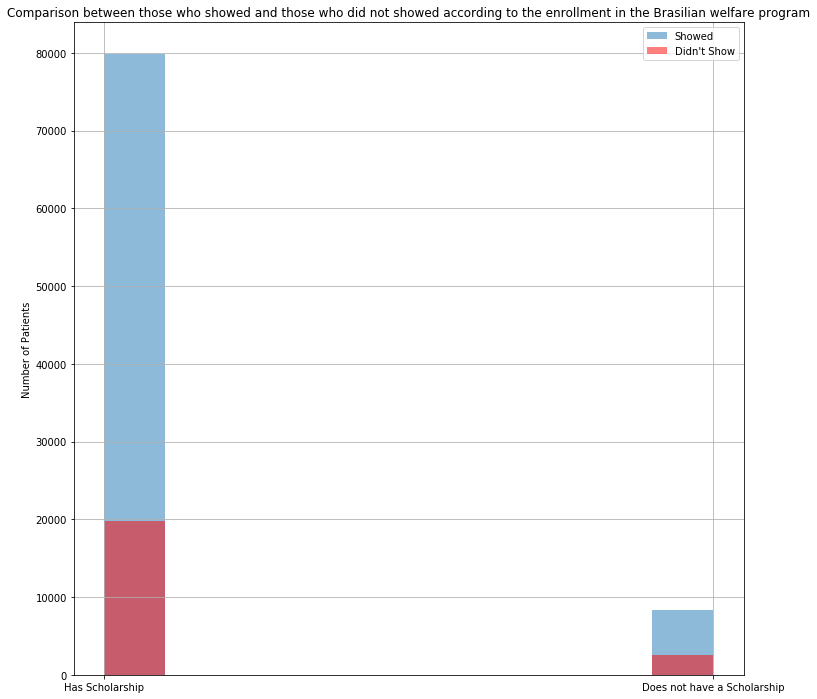

In [24]:
plt.figure(figsize=[12,12])
df.Scholarship[show].hist(alpha = 0.5, label = "Showed")
df.Scholarship[no_show].hist(alpha = 0.5, color='red', label = "Didn't Show")
plt.xticks([0, 1], ["Has Scholarship", "Does not have a Scholarship"]);
plt.legend()
plt.title('Comparison between those who showed and those who did not showed according to the enrollment in the Brasilian welfare program')
plt.ylabel('Number of Patients');

We notice that the patients who showed up:
- About 90% of them do not have a Scholarship, while 10% of them have.

While the patients who didn't show up:
- About 90% of them do not have a Scholarship, while 10% of them have.

So, as we see the ratios between both categories are the same and, as a result, we consider being enrolled in Brasilian welfare program is insigificant.

#### Comparing to Hypertension

In [25]:
print('The number of patients who showed who has Hypertension:\n{}'.format(df.Hypertension[show].value_counts()))
print('\n')
print('The number of patients who did not show who does not have Hypertension:\n{}'.format(df.Hypertension[no_show].value_counts()))

The number of patients who showed who has Hypertension:
0    70178
1    18029
Name: Hypertension, dtype: int64


The number of patients who did not show who does not have Hypertension:
0    18547
1     3772
Name: Hypertension, dtype: int64


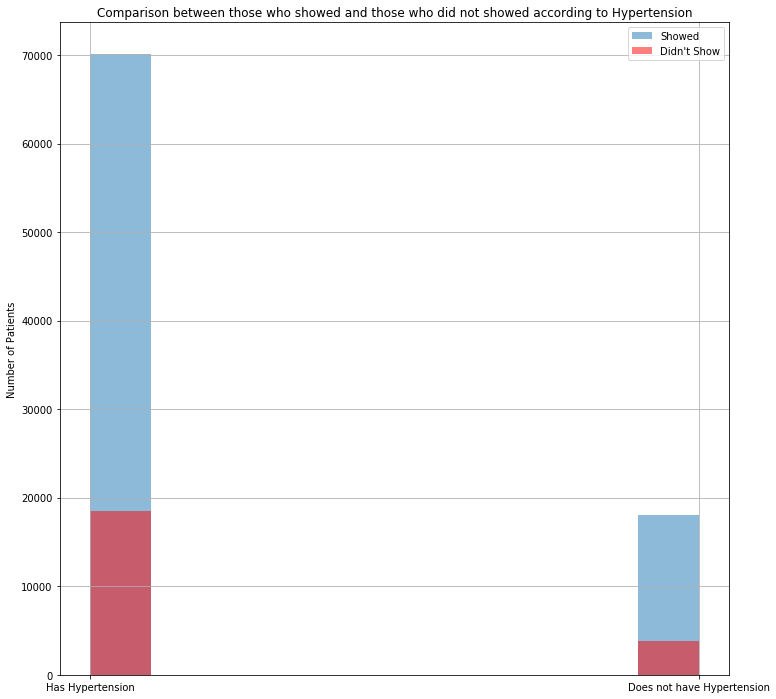

In [26]:
plt.figure(figsize=[12,12])
df.Hypertension[show].hist(alpha = 0.5, label = "Showed")
df.Hypertension[no_show].hist(alpha = 0.5, color='red', label = "Didn't Show")
plt.xticks([0, 1], ["Has Hypertension", "Does not have Hypertension"]);
plt.legend()
plt.title('Comparison between those who showed and those who did not showed according to Hypertension')
plt.ylabel('Number of Patients');

Hypertension is insignificant.

#### Comparing to Diabetes

In [27]:
print('The number of patients who showed who has Diabetes:\n{}'.format(df.Diabetes[show].value_counts()))
print('\n')
print('The number of patients who did not show who does not have Diabetes:\n{}'.format(df.Diabetes[no_show].value_counts()))

The number of patients who showed who has Diabetes:
0    81694
1     6513
Name: Diabetes, dtype: int64


The number of patients who did not show who does not have Diabetes:
0    20889
1     1430
Name: Diabetes, dtype: int64


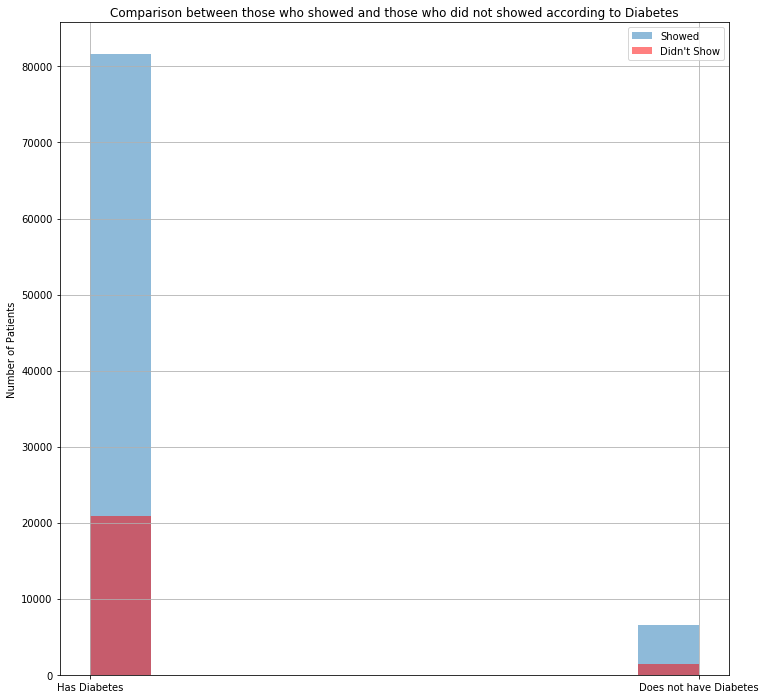

In [28]:
plt.figure(figsize=[12,12])
df.Diabetes[show].hist(alpha = 0.5, label = "Showed")
df.Diabetes[no_show].hist(alpha = 0.5, color='red', label = "Didn't Show")
plt.xticks([0, 1], ["Has Diabetes", "Does not have Diabetes"]);
plt.legend()
plt.title('Comparison between those who showed and those who did not showed according to Diabetes')
plt.ylabel('Number of Patients');

Diabetes is insignificant.

#### Comparing to Alcoholism

In [29]:
print('The number of patients who showed who has Alcoholism:\n{}'.format(df.Alcoholism[show].value_counts()))
print('\n')
print('The number of patients who did not show who does not have Alcoholism:\n{}'.format(df.Alcoholism[no_show].value_counts()))

The number of patients who showed who has Alcoholism:
0    85524
1     2683
Name: Alcoholism, dtype: int64


The number of patients who did not show who does not have Alcoholism:
0    21642
1      677
Name: Alcoholism, dtype: int64


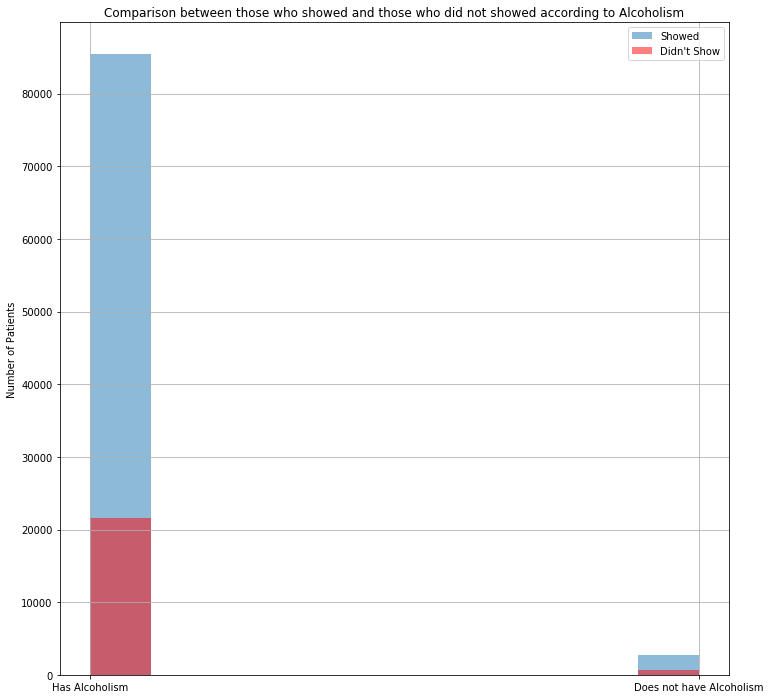

In [30]:
plt.figure(figsize=[12,12])
df.Alcoholism[show].hist(alpha = 0.5, label = "Showed")
df.Alcoholism[no_show].hist(alpha = 0.5, color='red', label = "Didn't Show")
plt.xticks([0, 1], ["Has Alcoholism", "Does not have Alcoholism"]);
plt.legend()
plt.title('Comparison between those who showed and those who did not showed according to Alcoholism')
plt.ylabel('Number of Patients');

Alcoholism is insignificant.

#### Comparing to Handicap

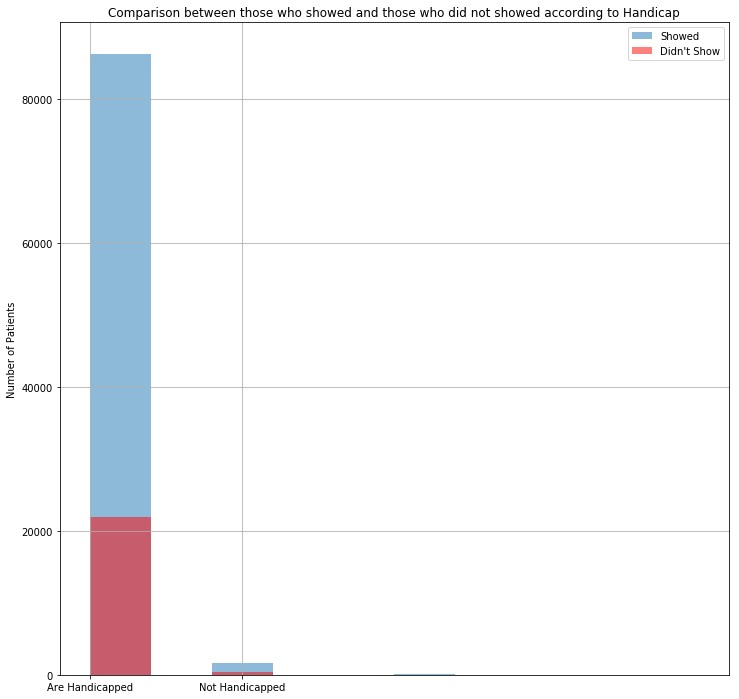

In [31]:
plt.figure(figsize=[12,12])
df.Handicap[show].hist(alpha = 0.5, label = "Showed")
df.Handicap[no_show].hist(alpha = 0.5, color='red', label = "Didn't Show")
plt.xticks([0, 1], ["Are Handicapped", "Not Handicapped"]);
plt.legend()
plt.title('Comparison between those who showed and those who did not showed according to Handicap')
plt.ylabel('Number of Patients');

Handicap is insignificant.

#### Comparing to Received SMS

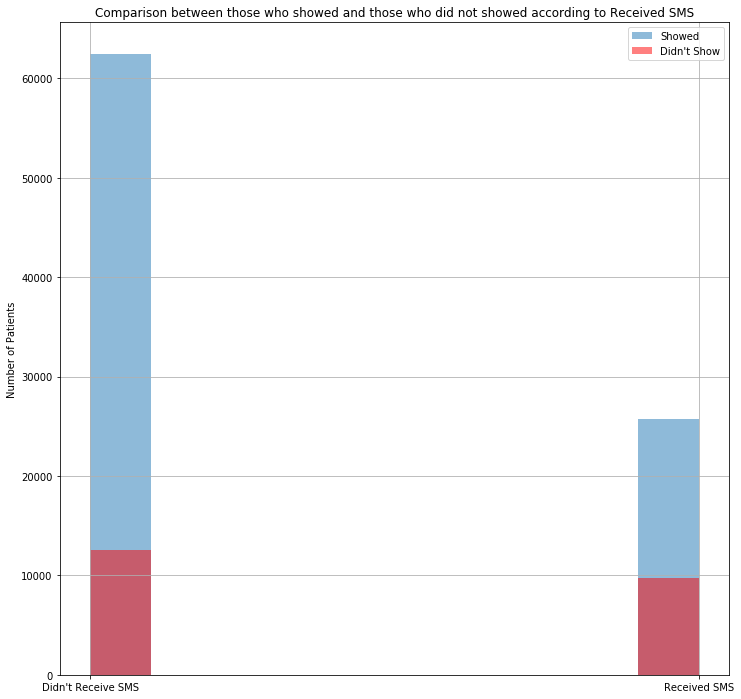

In [32]:
plt.figure(figsize=[12,12])
df.SMS_received[show].hist(alpha = 0.5, label = "Showed")
df.SMS_received[no_show].hist(alpha = 0.5, color='red', label = "Didn't Show")
plt.xticks([0, 1], ["Didn't Receive SMS", "Received SMS"]);
plt.legend()
plt.title('Comparison between those who showed and those who did not showed according to Received SMS')
plt.ylabel('Number of Patients');

We notice that the people who did not receive an SMS showed up more than the people who received an SMS, which is strange.

<a id='conclusions'></a>
## Conclusions

- We can say that, the Neighbourhood is strongly related to whether the patient showed up or not.
- We also noticed a correlation in the Age, as patients between the age of 0 to 10, showed up to their appointments more than the other groups and followed by the patients between the ages of 35 to 70.
- Finally, We noticed that the more people who showed up are the ones who did not receive an SMS.

### Limitations
- We couldn't find any correlation between our question and some characteristics which are:<br>
  Gender, Chronic Diseases and Disabilities.



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0